<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Finding How The Data Is Distributed**


Estimated time needed: **30** minutes


In this lab, you will work with a cleaned dataset to perform Exploratory Data Analysis (EDA). You will examine the structure of the data, visualize key variables, and analyze trends related to developer experience, tools, job satisfaction, and other important aspects.


## Objectives


In this lab you will perform the following:


- Understand the structure of the dataset.

- Perform summary statistics and data visualization.

- Identify trends in developer experience, tools, job satisfaction, and other key variables.


### Install the required libraries


In [1]:
!pip install pandas
!pip install matplotlib
!pip install seaborn


### Step 1: Import Libraries and Load Data


- Import the `pandas`, `matplotlib.pyplot`, and `seaborn` libraries.


- You will begin with loading the dataset. You can use the pyfetch method if working on JupyterLite. Otherwise, you can use pandas' read_csv() function directly on their local machines or cloud environments.


In [2]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Stack Overflow survey dataset
data_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv'
df = pd.read_csv(data_url)

# Display the first few rows of the dataset
df.head()


,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


### Step 2: Examine the Structure of the Data


- Display the column names, data types, and summary information to understand the data structure.

- Objective: Gain insights into the dataset's shape and available variables.


In [3]:
# Display column names
print("Column names:")
print(df.columns.tolist())

print("\nData types of each column:")
print(df.dtypes)

print("\nSummary information about the DataFrame:")
df.info()

print("\nStatistical summary of numeric columns:")
print(df.describe())

print("\nSample data preview:")
print(df.head())

Column names:
['ResponseId', 'MainBranch', 'Age', 'Employment', 'RemoteWork', 'Check', 'CodingActivities', 'EdLevel', 'LearnCode', 'LearnCodeOnline', 'TechDoc', 'YearsCode', 'YearsCodePro', 'DevType', 'OrgSize', 'PurchaseInfluence', 'BuyNewTool', 'BuildvsBuy', 'TechEndorse', 'Country', 'Currency', 'CompTotal', 'LanguageHaveWorkedWith', 'LanguageWantToWorkWith', 'LanguageAdmired', 'DatabaseHaveWorkedWith', 'DatabaseWantToWorkWith', 'DatabaseAdmired', 'PlatformHaveWorkedWith', 'PlatformWantToWorkWith', 'PlatformAdmired', 'WebframeHaveWorkedWith', 'WebframeWantToWorkWith', 'WebframeAdmired', 'EmbeddedHaveWorkedWith', 'EmbeddedWantToWorkWith', 'EmbeddedAdmired', 'MiscTechHaveWorkedWith', 'MiscTechWantToWorkWith', 'MiscTechAdmired', 'ToolsTechHaveWorkedWith', 'ToolsTechWantToWorkWith', 'ToolsTechAdmired', 'NEWCollabToolsHaveWorkedWith', 'NEWCollabToolsWantToWorkWith', 'NEWCollabToolsAdmired', 'OpSysPersonal use', 'OpSysProfessional use', 'OfficeStackAsyncHaveWorkedWith', 'OfficeStackAsyncWa

### Step 3: Handle Missing Data


- Identify missing values in the dataset.

- Impute or remove missing values as necessary to ensure data completeness.



In [7]:
import pandas as pd

# Assuming df is already loaded

# Identify missing values
missing_counts = df.isnull().sum()
print("Missing values per column:")
print(missing_counts[missing_counts > 0])

# Drop rows with missing values in critical columns
critical_columns = ['Country', 'LanguageHaveWorkedWith']
df_clean = df.dropna(subset=critical_columns).copy()  # use .copy() to avoid chained assignment issues

# For numeric columns, fill missing values with median using .loc
numeric_cols = df_clean.select_dtypes(include=['number']).columns
for col in numeric_cols:
    median_val = df_clean[col].median()
    df_clean.loc[:, col] = df_clean[col].fillna(median_val)

# For categorical columns, fill missing values with mode using .loc
categorical_cols = df_clean.select_dtypes(include=['object']).columns
for col in categorical_cols:
    mode_val = df_clean[col].mode()
    if not mode_val.empty:
        df_clean.loc[:, col] = df_clean[col].fillna(mode_val[0])

print("\nMissing values after cleaning:")
print(df_clean.isnull().sum()[df_clean.isnull().sum() > 0])

Missing values per column:
RemoteWork             10631
CodingActivities       10971
EdLevel                 4653
LearnCode               4949
LearnCodeOnline        16200
                       ...  
JobSatPoints_11        35992
SurveyLength            9255
SurveyEase              9199
ConvertedCompYearly    42002
JobSat                 36311
Length: 109, dtype: int64

Missing values after cleaning:
Series([], dtype: int64)


### Step 4: Analyze Key Columns


- Examine key columns such as `Employment`, `JobSat` (Job Satisfaction), and `YearsCodePro` (Professional Coding Experience).

- **Instruction**: Calculate the value counts for each column to understand the distribution of responses.



In [8]:
# Analyze key columns by calculating value counts

key_columns = ['Employment', 'JobSat', 'YearsCodePro']

for col in key_columns:
    if col in df_clean.columns:
        print(f"\nValue counts for '{col}':")
        print(df_clean[col].value_counts(dropna=False))  # include NaNs if any
    else:
        print(f"\nColumn '{col}' not found in the dataset.")


Value counts for 'Employment':
Employment
Employed, full-time                                                                                                                                                     34676
Independent contractor, freelancer, or self-employed                                                                                                                     4351
Student, full-time                                                                                                                                                       4026
Employed, full-time;Independent contractor, freelancer, or self-employed                                                                                                 3226
Not employed, but looking for work                                                                                                                                       2010
                                                                                       

### Step 5: Visualize Job Satisfaction (Focus on JobSat)


- Create a pie chart or KDE plot to visualize the distribution of `JobSat`.

- Provide an interpretation of the plot, highlighting key trends in job satisfaction.


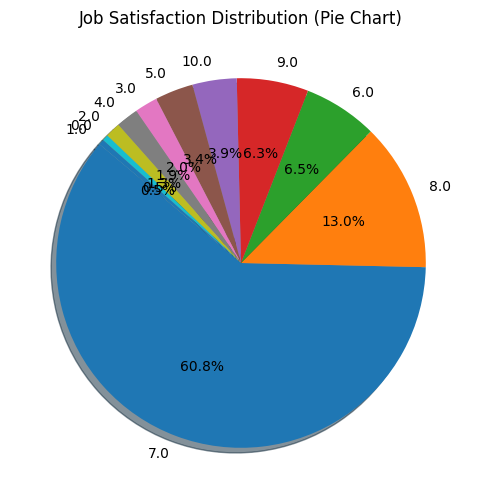

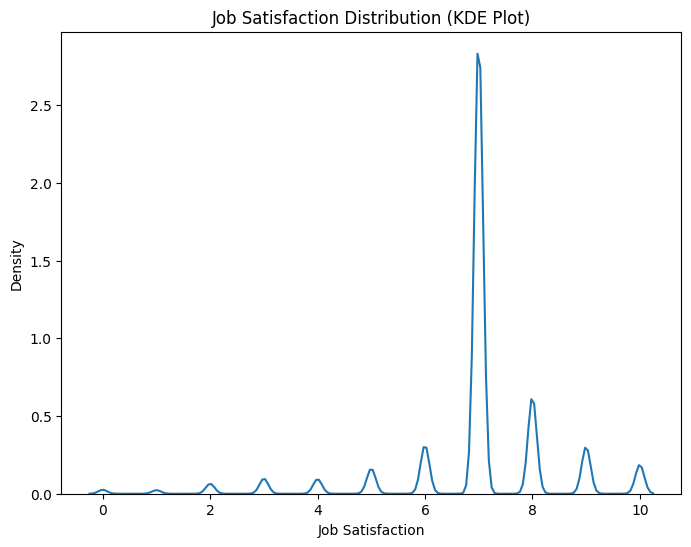

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Make sure 'JobSat' is in your DataFrame
if 'JobSat' in df_clean.columns:
    # Pie Chart
    job_sat_counts = df_clean['JobSat'].value_counts(dropna=False)
    plt.figure(figsize=(8, 6))
    job_sat_counts.plot.pie(autopct='%1.1f%%', startangle=140, shadow=True)
    plt.title('Job Satisfaction Distribution (Pie Chart)')
    plt.ylabel('')
    plt.show()

    # KDE Plot
    plt.figure(figsize=(8, 6))
    sns.kdeplot(data=df_clean, x='JobSat', bw_adjust=0.5)
    plt.title('Job Satisfaction Distribution (KDE Plot)')
    plt.xlabel('Job Satisfaction')
    plt.show()
else:
    print("Column 'JobSat' not found in the dataset.")

### Step 6: Programming Languages Analysis


- Compare the frequency of programming languages in `LanguageHaveWorkedWith` and `LanguageWantToWorkWith`.
  
- Visualize the overlap or differences using a Venn diagram or a grouped bar chart.


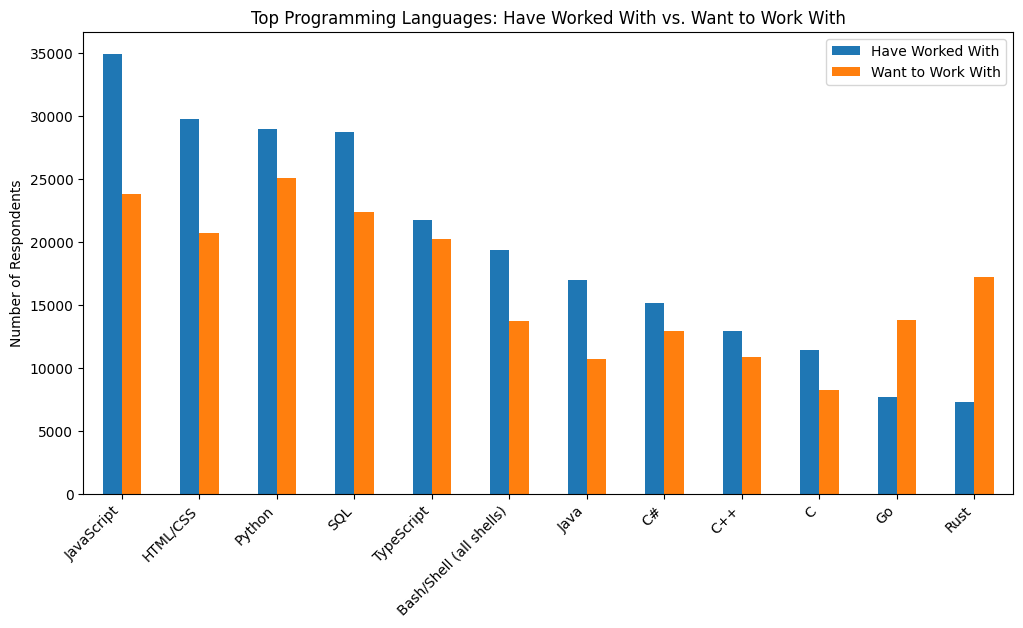

In [13]:
# Grouped bar chart without Venn diagram
import pandas as pd
import matplotlib.pyplot as plt

# Clean missing values first
df_clean = df.dropna(subset=['LanguageHaveWorkedWith', 'LanguageWantToWorkWith'])

# Count frequencies of languages in each column
worked_counts = df_clean['LanguageHaveWorkedWith'].str.get_dummies(';').sum().sort_values(ascending=False)
want_counts = df_clean['LanguageWantToWorkWith'].str.get_dummies(';').sum().sort_values(ascending=False)

# Select top 10 from each
top_worked = worked_counts.head(10)
top_want = want_counts.head(10)

# Combine all unique languages from both top lists
top_langs = list(set(top_worked.index).union(set(top_want.index)))

# Prepare DataFrame for plotting
freq_df = pd.DataFrame({
    'Have Worked With': worked_counts[top_langs],
    'Want to Work With': want_counts[top_langs]
}).fillna(0).sort_values('Have Worked With', ascending=False)

# Plot grouped bar chart
freq_df.plot(kind='bar', figsize=(12,6))
plt.title('Top Programming Languages: Have Worked With vs. Want to Work With')
plt.ylabel('Number of Respondents')
plt.xticks(rotation=45, ha='right')
plt.show()

### Step 7: Analyze Remote Work Trends


- Visualize the distribution of RemoteWork by region using a grouped bar chart or heatmap.


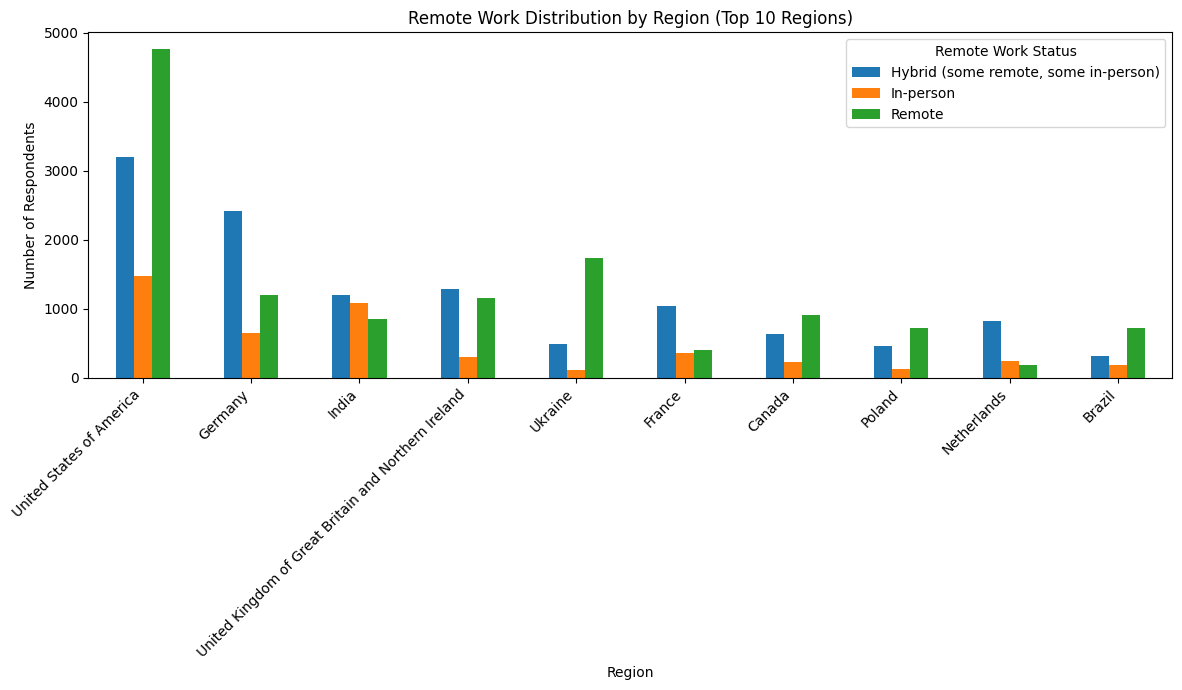

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
data_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv'
df = pd.read_csv(data_url)

# Replace 'Country' with the actual column name for region if different
region_col = 'Country'  

# Drop rows missing RemoteWork or region info
df_clean = df.dropna(subset=['RemoteWork', region_col])

# Count number of respondents by RemoteWork status and region
remote_counts = df_clean.groupby([region_col, 'RemoteWork']).size().unstack(fill_value=0)

# For better visualization, pick top N regions with most responses
top_regions = remote_counts.sum(axis=1).sort_values(ascending=False).head(10).index
remote_counts_top = remote_counts.loc[top_regions]

# Plot grouped bar chart
remote_counts_top.plot(kind='bar', stacked=False, figsize=(12,7))
plt.title('Remote Work Distribution by Region (Top 10 Regions)')
plt.ylabel('Number of Respondents')
plt.xlabel('Region')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Remote Work Status')
plt.tight_layout()
plt.show()

### Step 8: Correlation between Job Satisfaction and Experience


- Analyze the correlation between overall job satisfaction (`JobSat`) and `YearsCodePro`.
  
- Calculate the Pearson or Spearman correlation coefficient.


In [18]:
import pandas as pd
import numpy as np

# Load dataset
data_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv'
df = pd.read_csv(data_url)

# Select relevant columns and drop rows with missing values
df_corr = df[['JobSat', 'YearsCodePro']].dropna()

# Map JobSat to numeric scale
job_sat_mapping = {
    'Very dissatisfied': 1,
    'Somewhat dissatisfied': 2,
    'Neither satisfied nor dissatisfied': 3,
    'Somewhat satisfied': 4,
    'Very satisfied': 5
}
df_corr['JobSatNum'] = df_corr['JobSat'].map(job_sat_mapping)

# Convert YearsCodePro to numeric
def convert_years(x):
    if pd.isnull(x):
        return np.nan
    if x == 'Less than 1 year':
        return 0.5
    elif x == 'More than 50 years':
        return 51
    else:
        try:
            return float(x)
        except:
            return np.nan

df_corr['YearsCodeProNum'] = df_corr['YearsCodePro'].apply(convert_years)

# Drop rows with missing numeric values
df_corr_clean = df_corr.dropna(subset=['JobSatNum', 'YearsCodeProNum'])

# Calculate Pearson correlation using pandas
pearson_corr = df_corr_clean['JobSatNum'].corr(df_corr_clean['YearsCodeProNum'], method='pearson')

# Calculate Spearman correlation using pandas
spearman_corr = df_corr_clean['JobSatNum'].corr(df_corr_clean['YearsCodeProNum'], method='spearman')

print(f"Pearson correlation between Job Satisfaction and Years of Professional Coding Experience: {pearson_corr:.3f}")
print(f"Spearman correlation between Job Satisfaction and Years of Professional Coding Experience: {spearman_corr:.3f}")

Pearson correlation between Job Satisfaction and Years of Professional Coding Experience: nan
Spearman correlation between Job Satisfaction and Years of Professional Coding Experience: nan


### Step 9: Cross-tabulation Analysis (Employment vs. Education Level)


- Analyze the relationship between employment status (`Employment`) and education level (`EdLevel`).

- **Instruction**: Create a cross-tabulation using `pd.crosstab()` and visualize it with a stacked bar plot if possible.


/tmp/ipykernel_1110/4158664607.py:27: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


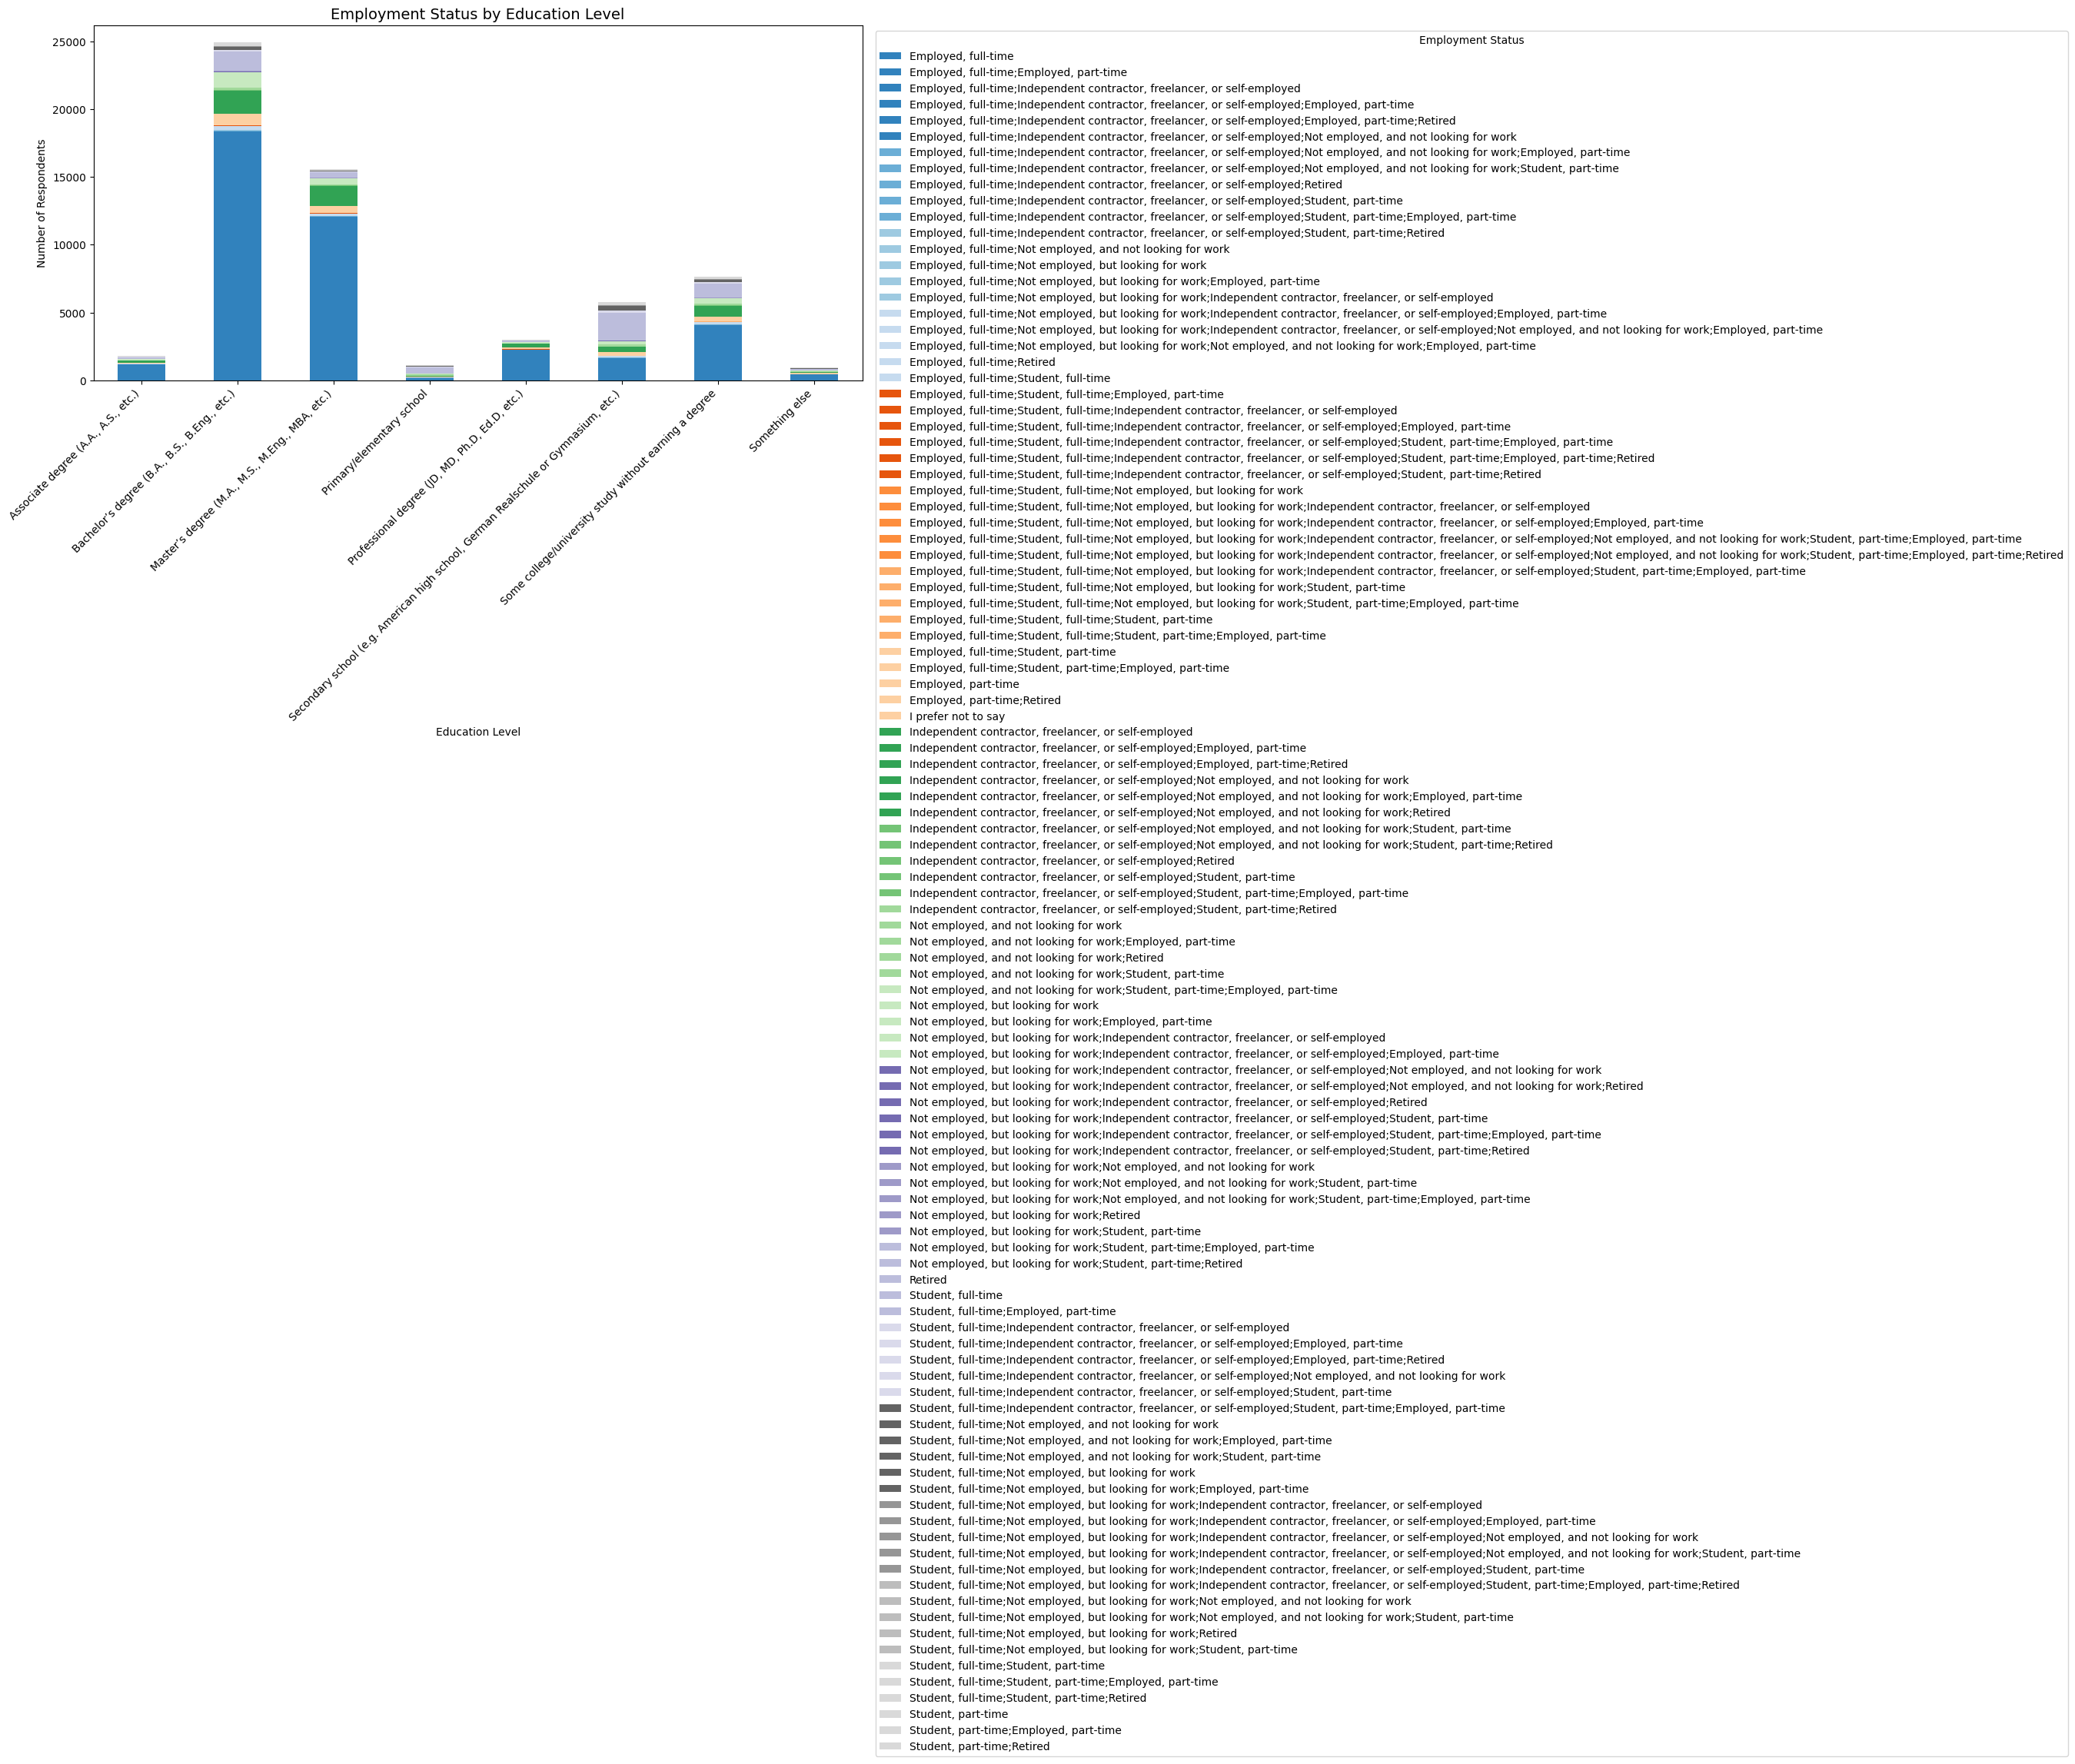

In [22]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
data_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv'
df = pd.read_csv(data_url)

# Drop rows with missing values in Employment or EdLevel
df_clean = df.dropna(subset=['Employment', 'EdLevel'])

# Create cross-tabulation
cross_tab = pd.crosstab(df_clean['EdLevel'], df_clean['Employment'])

# Normalize by rows if you want to see proportions (optional)
# cross_tab = cross_tab.div(cross_tab.sum(axis=1), axis=0)

# Increase figure width
cross_tab.plot(kind='bar', stacked=True, figsize=(16, 6), colormap='tab20c')

# Improve label and spacing
plt.title('Employment Status by Education Level', fontsize=14)
plt.xlabel('Education Level')
plt.ylabel('Number of Respondents')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Employment Status', bbox_to_anchor=(1.01, 1), loc='upper left')
plt.subplots_adjust(right=0.75)  # Add more room on the right
plt.tight_layout()

plt.show()


### Step 10: Export Cleaned Data


- Save the cleaned dataset to a new CSV file for further use or sharing.


In [ ]:
## Write your code here

### Summary:


In this lab, you practiced key skills in exploratory data analysis, including:


- Examining the structure and content of the Stack Overflow survey dataset to understand its variables and data types.

- Identifying and addressing missing data to ensure the dataset's quality and completeness.

- Summarizing and visualizing key variables such as job satisfaction, programming languages, and remote work trends.

- Analyzing relationships in the data using techniques like:
    - Comparing programming languages respondents have worked with versus those they want to work with.
      
    - Exploring remote work preferences by region.

- Investigating correlations between professional coding experience and job satisfaction.

- Performing cross-tabulations to analyze relationships between employment status and education levels.


## Authors:
Ayushi Jain


### Other Contributors:
Rav Ahuja
Lakshmi Holla
Malika


Copyright © IBM Corporation. All rights reserved.
